<a href="https://colab.research.google.com/github/exponentialR/DeepLearningFundamentals/blob/main/SimpleRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple Recurrent Neural Network**



### Steps

Step 1: Load in the data

Step 2: Build the model

Step 3: Train the model 

Step 4 : Evaluate the model 

Step 5: Make Predictions

##Load in the data 

To do this we will generate a synthetic data from Sine function

- Create a sine wave supervised learning dataset
    - Input data: sequence of length T 
    - Output: next value (scalar)

- Count from t = 0... len(series) - T
    - since the final target should be at len(series) -1

- Remember Linear Regression expects 2D input data =  N x T

- However, we are on RNN which expects 3D input Data = N x T x 1

see code in this cell

##Instantiate the Model

From tensorflow.keras.layers import Input, **SimpleRNN**, Dense--- Apparently this is an inbuilt model in Keras written in tensorflow. 

It is not a **simpleRNN** because it is easy to understand or that it is not complex. It is a simpleRNN because it is the actual name of the RNN. However, this is actually quite complex as compared ANN.

See snipet of code here



##Training and evaluation of the model 

See code here

Compile and plot the loss iteration to ensure it converges.

##Making PRedictions

- As mentioned earlier the input shape will be N x T x D, and with an output N x K
    - N = 1 D= 1, K = 1 

- A single time-series input will then be a 1D array of length T. 

see code here

In [10]:
import tensorflow as tf

In [11]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


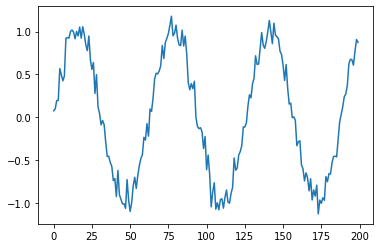

In [33]:
#make the original data 
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1

#plot the generated data 

plt.plot(series)
plt.show()



In [34]:
#It is time to build the dataset from the generated datasets
#The idea is to use the past values of T to predict the next value 
T= 10
D = 1 
X = []
Y = []
for t in range (len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)




X.shape (190, 10, 1) Y.shape (190,)


In [47]:
##Build the RNN Model 
i = Input(shape=(T, 1))
x = SimpleRNN(5, activation='relu')(i)
x = Dense (1)(x)
model = Model(i, x)
model.compile(
    loss = 'mse', 
    optimizer=Adam(lr = 0.1), 
)

#Training the model 
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs = 80,
    validation_data = (X[-N//2:], Y[-N//2:]), 
)

Epoch 1/80
3/3 [==============================] - 0s 58ms/step - loss: 0.4623 - val_loss: 0.2082
Epoch 2/80
3/3 [==============================] - 0s 8ms/step - loss: 0.1462 - val_loss: 0.2189
Epoch 3/80
3/3 [==============================] - 0s 8ms/step - loss: 0.1880 - val_loss: 0.2042
Epoch 4/80
3/3 [==============================] - 0s 8ms/step - loss: 0.1614 - val_loss: 0.1453
Epoch 5/80
3/3 [==============================] - 0s 10ms/step - loss: 0.1176 - val_loss: 0.1314
Epoch 6/80
3/3 [==============================] - 0s 7ms/step - loss: 0.1146 - val_loss: 0.1442
Epoch 7/80
3/3 [==============================] - 0s 8ms/step - loss: 0.1093 - val_loss: 0.1153
Epoch 8/80
3/3 [==============================] - 0s 8ms/step - loss: 0.0754 - val_loss: 0.0895
Epoch 9/80
3/3 [==============================] - 0s 8ms/step - loss: 0.0793 - val_loss: 0.0790
Epoch 10/80
3/3 [==============================] - 0s 8ms/step - loss: 0.0646 - val_loss: 0.0750
Epoch 11/80
3/3 [====================

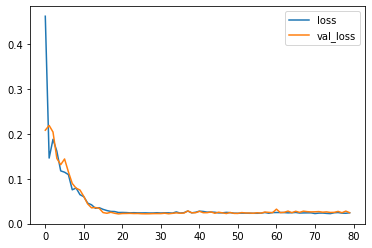

In [48]:
#plot the loss per iteration 
plt.plot(r.history['loss'], label ='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()


In [49]:
#One step forecast

validation_targer = Y[-N//2:]
validation_predictions = []

#index of first validation input 
i = -N//2

while len (validation_predictions) < len(validation_targer):
  p   =  model.predict (X[i].reshape(1, -1, 1))[0,0]  #1 x1 array --> scalar 
  i += 1

  validation_predictions.append(p)


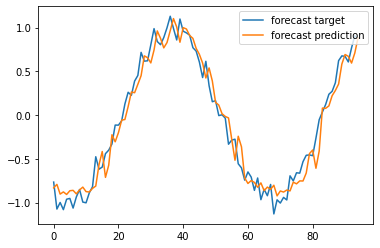

In [50]:
plt.plot(validation_targer, label = 'forecast target')
plt.plot(validation_predictions, label = 'forecast prediction')
plt.legend()

In [51]:
#Real  forecast for future values 
validation_targer = Y[-N//2:]
validation_predictions = []

#last train the input 
last_x = X[-N//2]

while len (validation_predictions)< len(validation_targer):
  p = model.predict (last_x.reshape(1, -1, 1))[0,0]

  validation_predictions.append(p)

  last_x = np.roll(last_x, -1)
  last_x[-1] = p
  

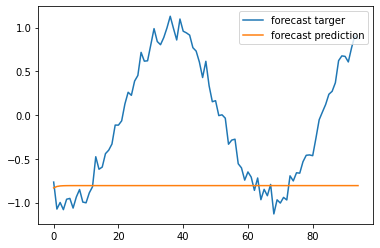

In [52]:
plt.plot(validation_targer, label = 'forecast targer')
plt.plot(validation_predictions, label = 'forecast prediction')
plt.legend()